# Modelo con Arquitectura Simple - VERSION 10

In [1]:
import os 
import tensorflow as tf
import keras  
import numpy as np
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Configuración para compatibilidad de matplotlib

## 1. Procesar imagenes


Partimos de un dataset con 9 categorias diferentes:
['Drought_Disaster', 'Earthquake_Disaster', 'LandSlide_Disaster', 'Non_Damage_Buildings_Street', 'Non_Damage_Sea', 'Non_Damage_Wildlife_Forest', 'Urban_Fire_Disaster', 'Water_Disaster', 'Wild_Fire_Disaster']

Cada carpeta cuenta con un nuemro diferente de imagenes, entre 200 y 4000 imagenes por clase. 

Para obtenes un dataset balanceado, obtendremso un conjunto de imagenes representativas de cada grupo y realizaremos un aumento de imagenes con ellas para conseguir un número parecido de imagenes para cada clase.

In [2]:
data_dir='data'                  #Guarda la ruto donde se encuentra la bases de datos
class_names=os.listdir(data_dir) #Obtiene el  nombre de las carpetas 
print(class_names)

['Drought_Disaster', 'Earthquake_Disaster', 'LandSlide_Disaster', 'Non_Damage_Buildings_Street', 'Non_Damage_Sea', 'Non_Damage_Wildlife_Forest', 'Urban_Fire_Disaster', 'Water_Disaster', 'Wild_Fire_Disaster']


In [83]:
# Limpieza de imagenes corruptas, solo es necesario ejecutar una vez.
for image_class in os.listdir(data_dir):                           #lista de carpetas en 'data'
    for image in os.listdir(os.path.join(data_dir, image_class)):  #loop por todas las imagenes
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)     # Comprobamos que se puede leer con opencv/cv2
            tip = imghdr.what(image_path)    # Comprobamos que las extensiones sean ['jpeg','jpg', 'bmp', 'png']
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)
            

In [3]:
import random
from pathlib import Path
import shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creamos la base de datos balanceada

# Configuración inicial
original_data_dir = 'data'
balanced_data_dir = 'data_balanced'
target_size = (256, 256)            # Ajusta según necesidad
batch_size = 32
max_images_per_class = 600

# Crear el directorio balanceado limpio con la misma estructura
if os.path.exists(balanced_data_dir):
    shutil.rmtree(balanced_data_dir)
os.makedirs(balanced_data_dir)

# Crear un generador de datos para la aumentación
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear la lista de imagenes y etiquetas vacia.
class_names = (os.listdir(original_data_dir))
image_paths = []
labels = []


# Recolectar imágenes y aplicar aumentación si es necesario

#Para cada clase recorre el mismo loop, guarda las imagenes y aumenta datos si es necesario
for label_index, class_name in enumerate(class_names):
    orig_class_dir = os.path.join(original_data_dir, class_name)
    new_class_dir = os.path.join(balanced_data_dir, class_name)
    os.makedirs(new_class_dir, exist_ok=True)

    #Obtiene lista de los paths de las imagenes para cada categoria
    all_images = [
        os.path.join(orig_class_dir, fname)
        for fname in os.listdir(orig_class_dir)
        if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]

    # Seleccionar hasta 'max_images_per_class' imágenes
    selected_images = random.sample(all_images, min(len(all_images), max_images_per_class))

    # Copiar las imágenes seleccionadas al nuevo directorio
    for image_path in selected_images:
        shutil.copy(image_path, os.path.join(balanced_data_dir, class_name))
    print(f"Imagenes de la clase {class_name} copiadas a nuevo directorio")
    
    # Si la clase tiene menos de max imágenes, aplicamos Data Augmentation
    if len(selected_images) < max_images_per_class:
        print(f"Aplicando aumentación a la clase {class_name} para alcanzar {max_images_per_class} imágenes...")

        # Usamos data augmentation para generar imágenes adicionales
        images_needed = max_images_per_class - len(selected_images)
        
        # Usamos data augmentation para generar imágenes adicionales
        i = 0
        for image_path in selected_images:
            if i >= images_needed:
                break
            img = Image.open(image_path).convert('RGB').resize(target_size)
            x = np.array(img)
            x = np.expand_dims(np.array(img), axis=0)
            
            # Generamos nuevas imágenes y las copiamos a la carpeta nueva
            for batch in datagen.flow(x, batch_size=1, save_to_dir=os.path.join(balanced_data_dir, class_name), save_prefix='aug', save_format='png'):
                i += 1
                break # solo una imagen por iteración
                
        print(f"Aumentación a la clase {class_name} realiazda")


    # Actualizamos la lista de imágenes seleccionadas después de la aumentación
    selected_images = [
        os.path.join(balanced_data_dir,class_name, fname)
        for fname in os.listdir(os.path.join(balanced_data_dir, class_name))
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')) 
    ]
      
    
    # Actualizamos las rutas y etiquetas
    image_paths.extend(selected_images)
    labels.extend([label_index] * len(selected_images))

print("\nImágenes balanceadas y guardadas en 'data_balanced'")

Imagenes de la clase Drought_Disaster copiadas a nuevo directorio
Aplicando aumentación a la clase Drought_Disaster para alcanzar 600 imágenes...
Aumentación a la clase Drought_Disaster realiazda
Imagenes de la clase Earthquake_Disaster copiadas a nuevo directorio
Aplicando aumentación a la clase Earthquake_Disaster para alcanzar 600 imágenes...
Aumentación a la clase Earthquake_Disaster realiazda
Imagenes de la clase LandSlide_Disaster copiadas a nuevo directorio
Aplicando aumentación a la clase LandSlide_Disaster para alcanzar 600 imágenes...
Aumentación a la clase LandSlide_Disaster realiazda
Imagenes de la clase Non_Damage_Buildings_Street copiadas a nuevo directorio
Imagenes de la clase Non_Damage_Sea copiadas a nuevo directorio
Imagenes de la clase Non_Damage_Wildlife_Forest copiadas a nuevo directorio
Imagenes de la clase Urban_Fire_Disaster copiadas a nuevo directorio
Aplicando aumentación a la clase Urban_Fire_Disaster para alcanzar 600 imágenes...
Aumentación a la clase Urban

## 2. Normalizamos datos

In [4]:
# Escalar imágenes para pixeles de valores entre 0 y 1, en vez de entre 0 y 255
# Convertir a arrays normalizados
image_arrays = []
for path in image_paths:
    img = Image.open(path).convert('RGB').resize(target_size)
    img_array = np.array(img).astype(np.float32) / 255.0  # Normalizar
    image_arrays.append(img_array)

X = np.array(image_arrays)
y = np.array(labels)

print(f"\nConjunto escalado: X.shape = {X.shape}, y.shape = {y.shape}")


Conjunto escalado: X.shape = (5191, 256, 256, 3), y.shape = (5191,)


In [8]:
# Comprobamos que el formato es correcto
X[1]           # Los pixeles se encuentran entre 0 y 1 

array([[[0.69803923, 0.78039217, 0.84705883],
        [0.69411767, 0.78039217, 0.84705883],
        [0.6901961 , 0.78039217, 0.84313726],
        ...,
        [0.91764706, 0.92156863, 0.9372549 ],
        [0.90588236, 0.9098039 , 0.9254902 ],
        [0.8980392 , 0.9019608 , 0.91764706]],

       [[0.69803923, 0.78039217, 0.84705883],
        [0.69411767, 0.7764706 , 0.84313726],
        [0.6901961 , 0.77254903, 0.8352941 ],
        ...,
        [0.94509804, 0.9490196 , 0.9607843 ],
        [0.94509804, 0.9490196 , 0.9607843 ],
        [0.9372549 , 0.9411765 , 0.9529412 ]],

       [[0.7058824 , 0.79607844, 0.85882354],
        [0.7019608 , 0.7882353 , 0.8509804 ],
        [0.7058824 , 0.78431374, 0.8509804 ],
        ...,
        [0.9529412 , 0.95686275, 0.9647059 ],
        [0.95686275, 0.9607843 , 0.96862745],
        [0.9529412 , 0.95686275, 0.9647059 ]],

       ...,

       [[0.3254902 , 0.32941177, 0.14901961],
        [0.32941177, 0.3529412 , 0.1764706 ],
        [0.3529412 , 0

In [9]:
# Comprobamos que el formato es correcto
y  #las etiquetas se representan con números enteros

array([0, 0, 0, ..., 8, 8, 8])

## 3. Dividimos datos

In [11]:
from sklearn.model_selection import train_test_split

# División estratificada (train, val, test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, stratify=y_train_val, random_state=42)

# 0.125 ≈ 0.10 / 0.80 → para que val sea el 20% final

Para facilitar el trabajo a lo largo del entrenamiento guardamos el conjunto de datos para poder acceder a el de forma rápida y sencilla, cada vez que deseemos entrenar.

In [12]:
# Guardamos el conjunto de datos dividido , para su fácil acceso
# Crea la carpeta si no existe
os.makedirs("split_data", exist_ok=True)

# Guardar todos los arrays en un solo archivo comprimido
np.savez_compressed('split_data/dataset.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_val=X_val,
                    y_val=y_val,
                    X_test=X_test,
                    y_test=y_test)

print("Datos guardados en 'split_data/dataset.npz'")

Datos guardados en 'split_data/dataset.npz'


## 4. Cargamos y visualizamos datos

In [36]:
#Cargamos datos desde split_data
import numpy as np

# Cargar el archivo comprimido
data = np.load('split_data/dataset.npz')

# Asignar a variables
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

print("Datos cargados correctamente desde 'split_data/dataset.npz'")

Datos cargados correctamente desde 'split_data/dataset.npz'


In [6]:
print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
class_names=os.listdir('data') #Obtiene el  nombre de las carpetas 
# Mostrar el número de imágenes por clase en el conjunto final
print("\nDistribución de imágenes por clase:")
for i, class_name in enumerate(class_names):
    train_count = sum([1 for label in y_train if label == i])
    val_count = sum([1 for label in y_val if label == i])
    test_count = sum([1 for label in y_test if label == i])
    print(f"{class_name}: Entrenamiento={train_count}, Validación={val_count}, Test={test_count}")

Train: 4087, Val: 584, Test: 519

Distribución de imágenes por clase:
Drought_Disaster: Entrenamiento=310, Validación=44, Test=39
Earthquake_Disaster: Entrenamiento=473, Validación=67, Test=60
LandSlide_Disaster: Entrenamiento=472, Validación=67, Test=60
Non_Damage_Buildings_Street: Entrenamiento=473, Validación=67, Test=60
Non_Damage_Sea: Entrenamiento=472, Validación=68, Test=60
Non_Damage_Wildlife_Forest: Entrenamiento=472, Validación=68, Test=60
Urban_Fire_Disaster: Entrenamiento=471, Validación=67, Test=60
Water_Disaster: Entrenamiento=472, Validación=68, Test=60
Wild_Fire_Disaster: Entrenamiento=472, Validación=68, Test=60


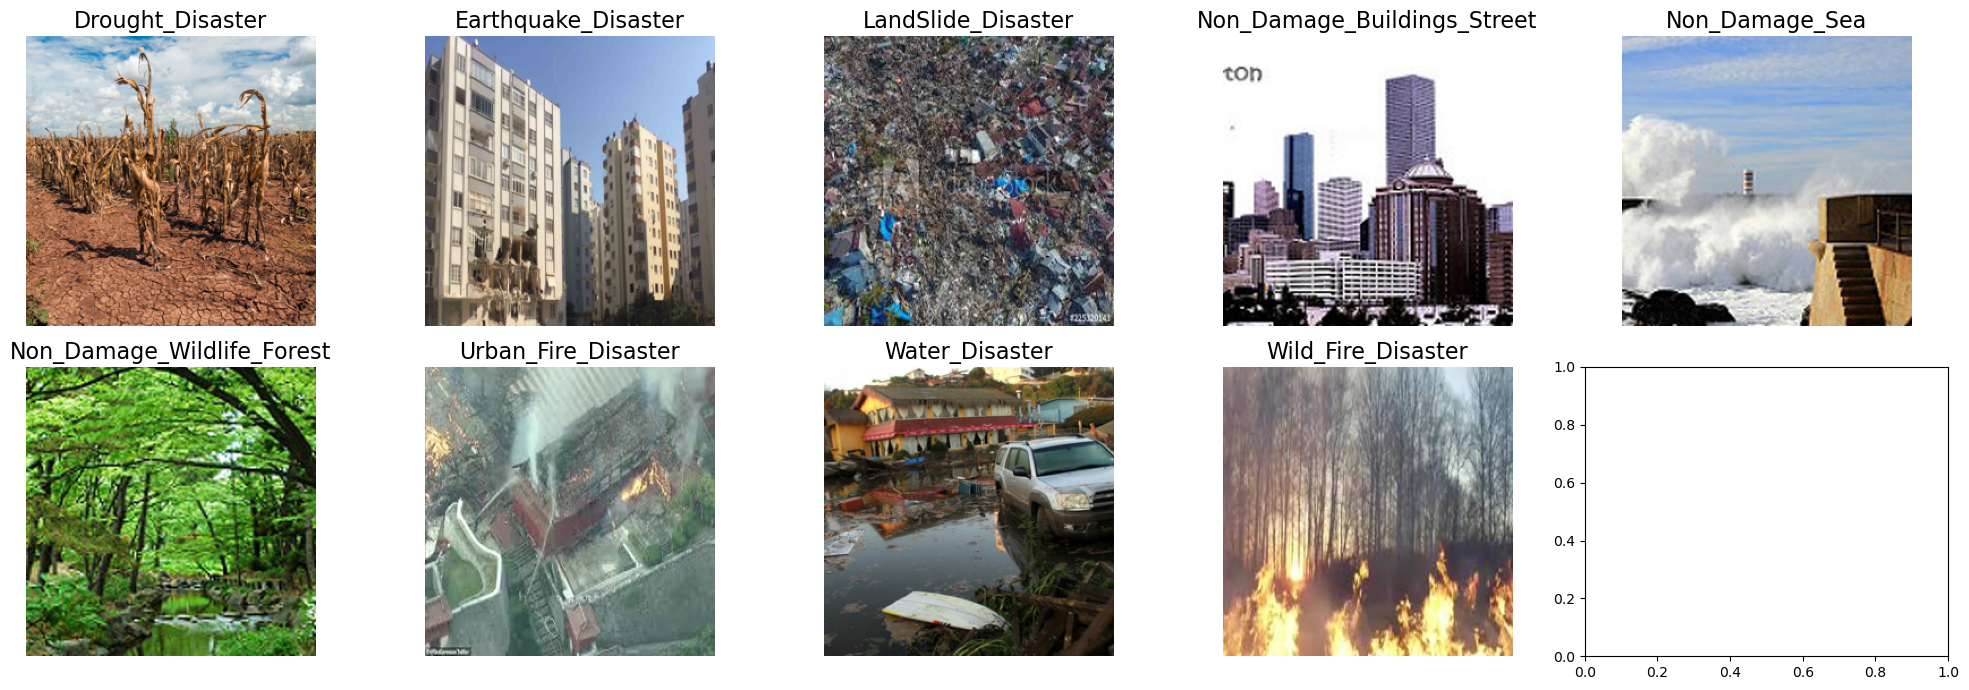

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_size = (256,256)
data_dir='data'
class_names=os.listdir(data_dir) #Obtiene el  nombre de las carpetas 

# Crear la figura 3x3
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 7))

# Obtener una imagen de cada clase y mostrarla
for idx, class_name in enumerate(class_names):
    
    # Obtener la ruta de las imágenes de la clase
    class_dir = os.path.join(data_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[1])  # Tomamos una imagen
    img = Image.open(image_path).convert('RGB').resize(img_size)
    img_array = np.array(img) / 255.0                               # Normalizamos a 0-1

    # Determinar la posición de la subgráfica
    row = idx // 5  # Calculamos la fila
    col = idx % 5   # Calculamos la columna

    # Mostrar la imagen
    ax[row, col].imshow(img_array)
    ax[row, col].title.set_text(class_name)  # Establecer el título con el nombre de la clase
    ax[row, col].title.set_fontsize(16)      # Ajusta el tamaño de la fuente aquí
    ax[row, col].axis('off')                 # Desactivar los ejes para una mejor presentación

plt.tight_layout()            # Ajusta el espaciado entre las subgráficas
plt.show()
plt.close()

## 5. Arquitectura del modelo

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard

In [14]:
#Creamos nuestro modelo:
model = Sequential()

In [15]:
# Añadimos capas
    #Capa convolucional: 32 filtros de 3x3 pixels, stride = 1, activation = relu + entradas: 1 image
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

    #Capa convolucional: 64 filtros de 3x3 pixels, stride = 1, activation = relu
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

    #Capa convolucional: 128 filtros de 3x3 pixels, stride = 1, activation = relu
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

    #Capa de normalización de los resultados
model.add(BatchNormalization())

    #Conectar capas convolucionales con capas densas
model.add(GlobalAveragePooling2D())

    #Añadimos capa densa de 256 neuron con ReLU
model.add(Dense(256, activation='relu'))

    #Usamos Dropout para evitar over-fitting
model.add(Dropout(0.5)) 

    #Capa de salida con tantas neuronas como clases con 'softmax'
model.add(Dense(9, activation='softmax')) #Capa de salida

In [16]:
# Añadimos optimizador
model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy']
             )

In [17]:
# Callbacks

# Early Stoping Call-Backc para parar el proceso de entrenamiento despueés de 'patience' épocas si no mejora
early_stop = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')

# ReduceLROnPlateau Call-Back para reducir la tasa de aprendizaje según el parámetro 'monitor' 
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.2, monitor='val_loss',  min_lr=1e-5)

# Usamos Tensorboard, para guardar los datos de entrenamiento
tensorboard_callback = TensorBoard('logs')

In [18]:
# Visualizamos las entradas y salida de cada capa
for layer in model.layers:
    print(f"Layer name: {layer.name}")
    print(f"  Input shape: {layer.input_shape}")
    print(f"  Output shape: {layer.output_shape}")
    print("-" * 10)

Layer name: conv2d
  Input shape: (None, 256, 256, 3)
  Output shape: (None, 254, 254, 32)
----------
Layer name: max_pooling2d
  Input shape: (None, 254, 254, 32)
  Output shape: (None, 127, 127, 32)
----------
Layer name: conv2d_1
  Input shape: (None, 127, 127, 32)
  Output shape: (None, 125, 125, 64)
----------
Layer name: max_pooling2d_1
  Input shape: (None, 125, 125, 64)
  Output shape: (None, 62, 62, 64)
----------
Layer name: conv2d_2
  Input shape: (None, 62, 62, 64)
  Output shape: (None, 60, 60, 128)
----------
Layer name: max_pooling2d_2
  Input shape: (None, 60, 60, 128)
  Output shape: (None, 30, 30, 128)
----------
Layer name: batch_normalization
  Input shape: (None, 30, 30, 128)
  Output shape: (None, 30, 30, 128)
----------
Layer name: global_average_pooling2d
  Input shape: (None, 30, 30, 128)
  Output shape: (None, 128)
----------
Layer name: dense
  Input shape: (None, 128)
  Output shape: (None, 256)
----------
Layer name: dropout
  Input shape: (None, 256)
  Out

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

## 6. Entrenamiento

In [19]:
hist = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr,early_stop, tensorboard_callback])


Epoch 1/40
128/128 [==============================] - 81s 618ms/step - loss: 1.6092 - accuracy: 0.4010 - val_loss: 2.0223 - val_accuracy: 0.1524 - lr: 0.0010
Epoch 2/40
128/128 [==============================] - 77s 601ms/step - loss: 1.2496 - accuracy: 0.5332 - val_loss: 1.6400 - val_accuracy: 0.4298 - lr: 0.0010
Epoch 3/40
128/128 [==============================] - 76s 591ms/step - loss: 1.0995 - accuracy: 0.5853 - val_loss: 1.4051 - val_accuracy: 0.4760 - lr: 0.0010
Epoch 4/40
128/128 [==============================] - 77s 602ms/step - loss: 1.0207 - accuracy: 0.6188 - val_loss: 1.3875 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 5/40
128/128 [==============================] - 76s 591ms/step - loss: 0.9211 - accuracy: 0.6491 - val_loss: 1.3745 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/40
128/128 [==============================] - 76s 595ms/step - loss: 0.8769 - accuracy: 0.6753 - val_loss: 1.4238 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 7/40
128/128 [==============================] 

## 7. Evaluar resultados

In [251]:
# Resultados finales del enrenamiento
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

Train Loss: 0.3986, Train Accuracy: 0.8503


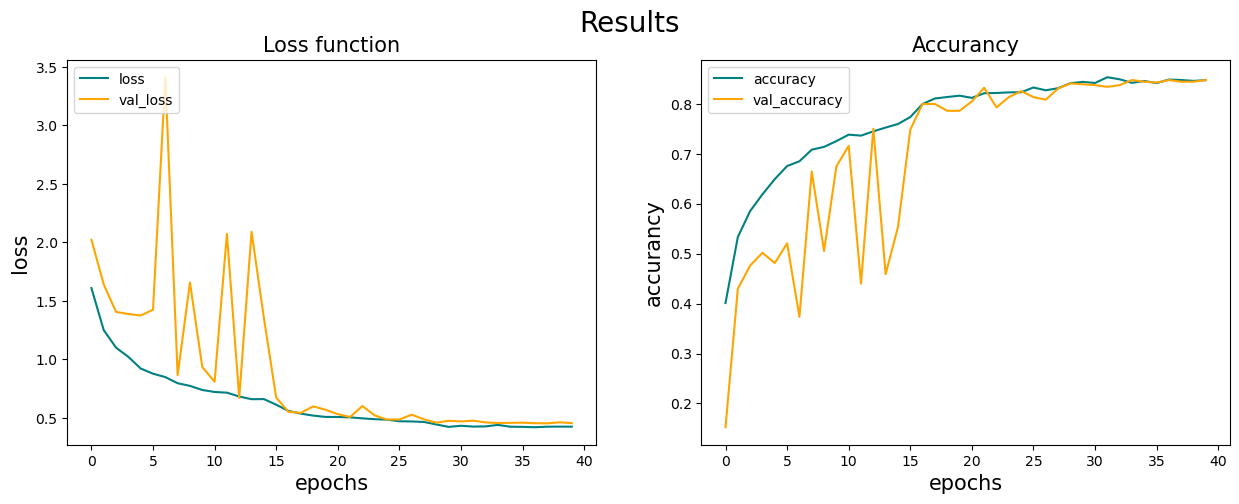

In [20]:
# Visualizar el proceso de entrenamiento
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,5))
fig.suptitle('Results', fontsize=20)

plt.subplot(121)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss function', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.legend(loc="upper left")

plt.subplot(122)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accurancy', fontsize=15)
plt.ylabel('accurancy', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.legend(loc="upper left")

plt.show()
plt.close()

In [21]:
# Calcular las predicciones sobre el conjunto de validación
y_true = []
y_pred = []

for i in range(len(X_val)):
    image_batch = np.expand_dims(X_val[i], axis=0)  # Asegura que la imagen esté en el formato (1, altura, ancho, canales)
    label_batch = np.expand_dims(y_val[i], axis=0)  # Asegura que la etiqueta esté en el formato correcto

    preds = model.predict(image_batch)           # Realiza la predicción
    y_true.append(label_batch[0])                # Agregar la etiqueta verdadera
    y_pred.append(np.argmax(preds, axis=1)[0])   # Agregar la clase predicha

1/1 [==============================] - 0s 19ms/step


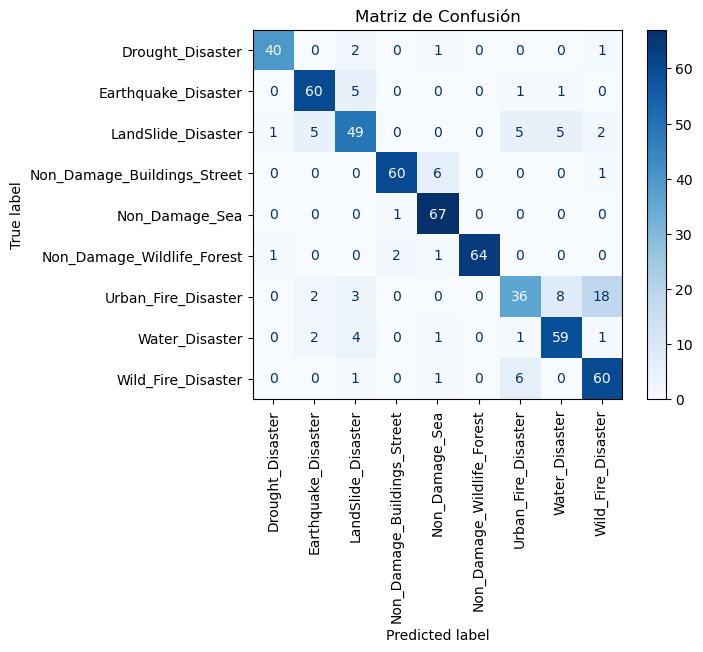

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Elaborar las matrices de confusión 
cm = confusion_matrix(y_true, y_pred)
class_names=os.listdir('data_balanced') 

# Mostrar con etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()
plt.close()

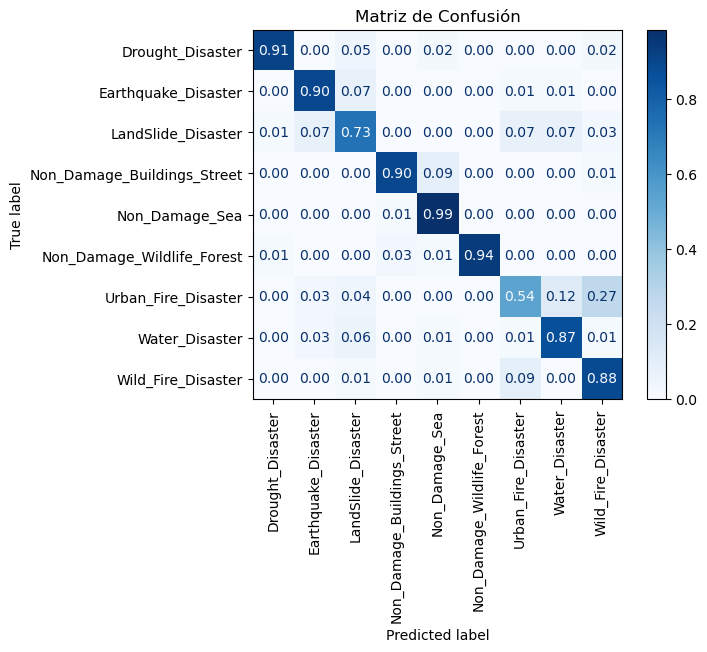

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Calcular la matriz de confusión normalizada (por filas)
cm = confusion_matrix(y_true, y_pred, normalize='true')  # O 'pred' o 'all' según lo que desees
class_names=os.listdir('data_balanced') 

# Mostrarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical',cmap='Blues', values_format='.2f')  # Mostrar valores con decimales
plt.title('Matriz de Confusión')
plt.show()
plt.close()

## 8. Test

Se procede a analizar con profundidad el rendmiento en el grupo de pruba (imagenes que el modelo no ha visto)

In [38]:
import numpy as np
from sklearn.metrics import classification_report

# Se obtiene las predicciones y las etiquetas correctas

# Obtener todas las predicciones de una vez
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Asegurar que etiquetas son arrays planos
y_true_flat = y_test.ravel()
y_pred_flat = y_pred.ravel()

class_names=os.listdir('data_balanced')

print("\nClassification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=class_names))


17/17 [==============================] - 2s 129ms/step

Classification Report:
                             precision    recall  f1-score   support

           Drought_Disaster       0.92      0.85      0.88        39
        Earthquake_Disaster       0.81      0.87      0.84        60
         LandSlide_Disaster       0.73      0.73      0.73        60
Non_Damage_Buildings_Street       1.00      0.90      0.95        60
             Non_Damage_Sea       0.95      1.00      0.98        60
 Non_Damage_Wildlife_Forest       0.95      1.00      0.98        60
        Urban_Fire_Disaster       0.76      0.65      0.70        60
             Water_Disaster       0.84      0.82      0.83        60
         Wild_Fire_Disaster       0.71      0.83      0.77        60

                   accuracy                           0.85       519
                  macro avg       0.85      0.85      0.85       519
               weighted avg       0.85      0.85      0.85       519



## 9. Guardar el modelo

Se guarda el modelo final con la función load.model en el directorio.

In [28]:
model.save(os.path.join('models','imageclassifier10.h5'))

## 10. Cargar el modelo

In [22]:
from tensorflow.keras.models import load_model

In [37]:
model = load_model(os.path.join('models', 'imageclassifier10.h5'))